In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
df = pd.read_csv('lending_club_loan_two.csv')

In [5]:
df.head(3)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"


In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
loan_amnt,396030.0,14113.888089,8357.441341,500.00,8000.00,12000.00,20000.00,40000.00
int_rate,396030.0,13.639400,4.472157,5.32,10.49,13.33,16.49,30.99
installment,396030.0,431.849698,250.727790,16.08,250.33,375.43,567.30,1533.81
annual_inc,396030.0,74203.175798,61637.621158,0.00,45000.00,64000.00,90000.00,8706582.00
dti,396030.0,17.379514,18.019092,0.00,11.28,16.91,22.98,9999.00
open_acc,396030.0,11.311153,5.137649,0.00,8.00,10.00,14.00,90.00
pub_rec,396030.0,0.178191,0.530671,0.00,0.00,0.00,0.00,86.00
revol_bal,396030.0,15844.539853,20591.836109,0.00,6025.00,11181.00,19620.00,1743266.00
revol_util,395754.0,53.791749,24.452193,0.00,35.80,54.80,72.90,892.30
total_acc,396030.0,25.414744,11.886991,2.00,17.00,24.00,32.00,151.00


# Visualisation Section

###### Lets explore the data and prepare for feature engineering

In [7]:
x = df.groupby('loan_status').mean()
y = df.groupby('loan_status')['loan_amnt'].describe()

In [8]:
x

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_status,,,,,,,,,,,,
Charged Off,15126.300967,15.882587,452.703110,67535.537710,19.656346,11.602513,0.199606,15390.454701,57.869824,24.984152,1.501213,0.128412
Fully Paid,13866.878771,13.092105,426.761866,75829.951566,16.824010,11.240067,0.172966,15955.327918,52.796918,25.519800,1.892836,0.119997


In [9]:
y

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


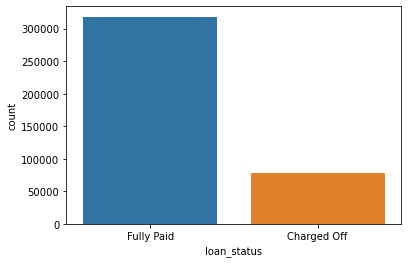

In [10]:
sns.countplot(x='loan_status', data=df)

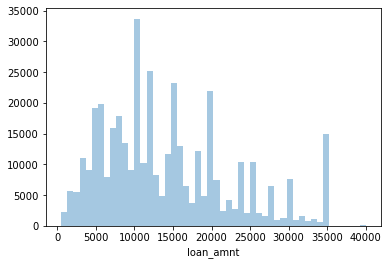

In [11]:
sns.distplot(df['loan_amnt'], kde=False)

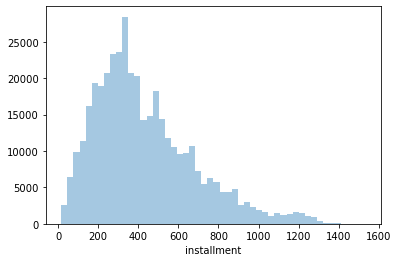

In [12]:
sns.distplot(df['installment'], kde=False)

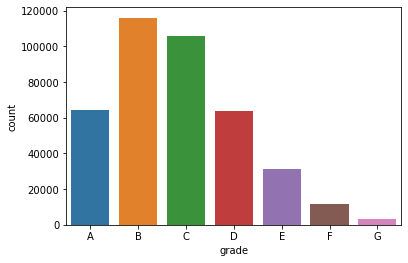

In [13]:
grade_order = sorted(df['grade'].unique())
sns.countplot(x='grade',data=df, order = grade_order)

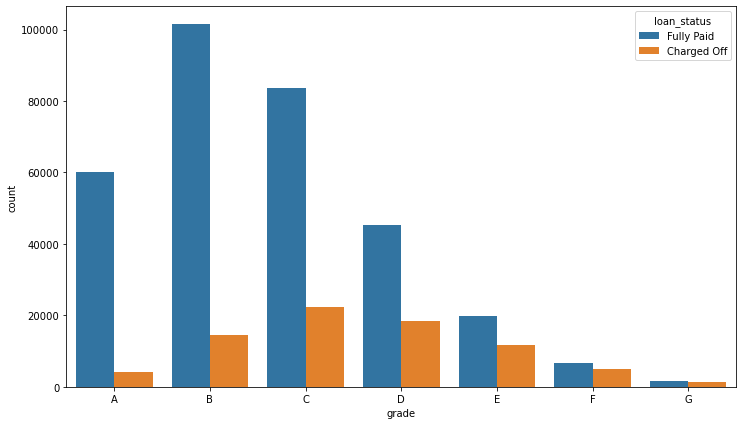

In [14]:
plt.figure(figsize=(12,7))
sns.countplot(x='grade', hue='loan_status',order=grade_order, data=df)

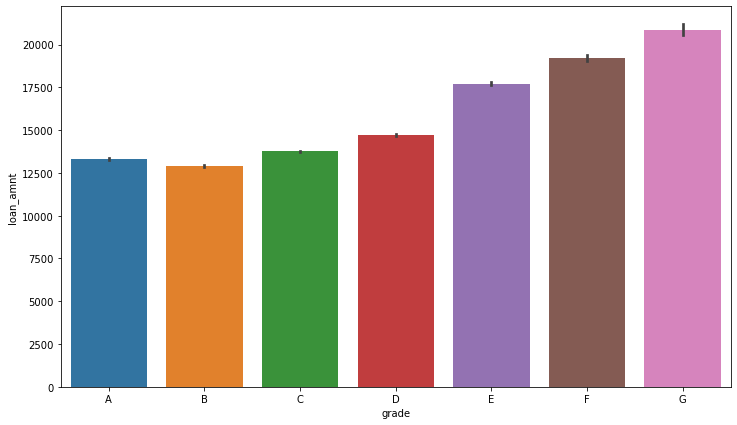

In [15]:
#check mean loan amount by credit score
plt.figure(figsize=(12,7))
sns.barplot(y = 'loan_amnt', x='grade',order=grade_order, data = df)

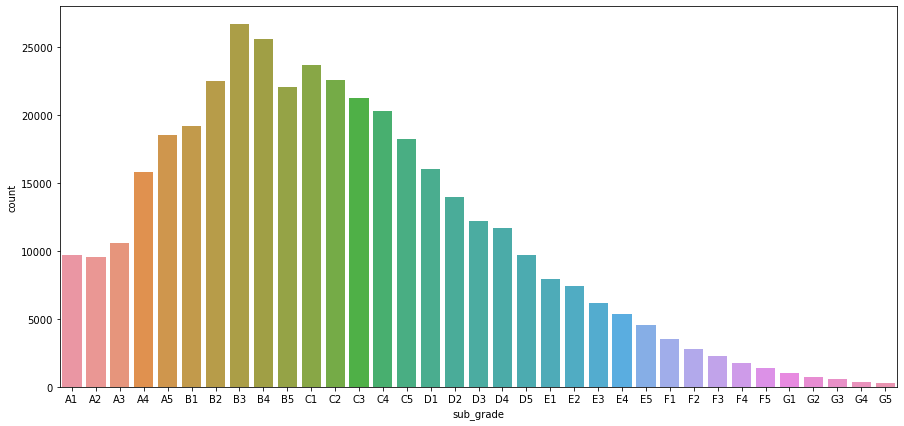

In [16]:
plt.figure(figsize=(15,7))
subgrade_order = sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade', data=df, order=subgrade_order)

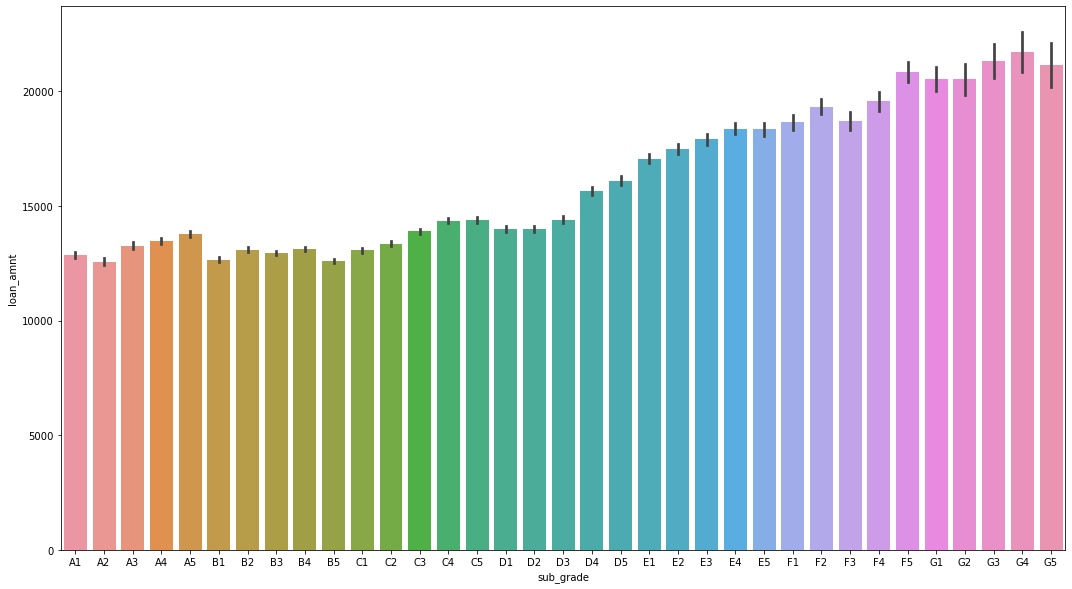

In [17]:
#check mean loan amount by credit subscore
plt.figure(figsize=(18,10))
sns.barplot(y = 'loan_amnt', x='sub_grade', data = df, order = subgrade_order)

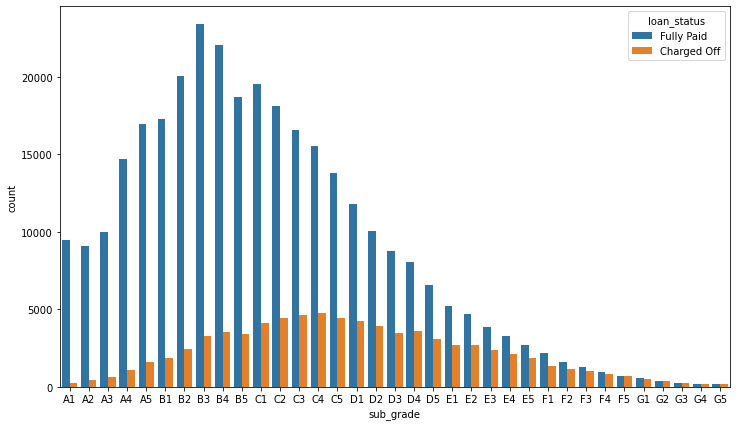

In [18]:
plt.figure(figsize=(12,7))
sns.countplot(x='sub_grade', hue='loan_status',order=subgrade_order, data=df)

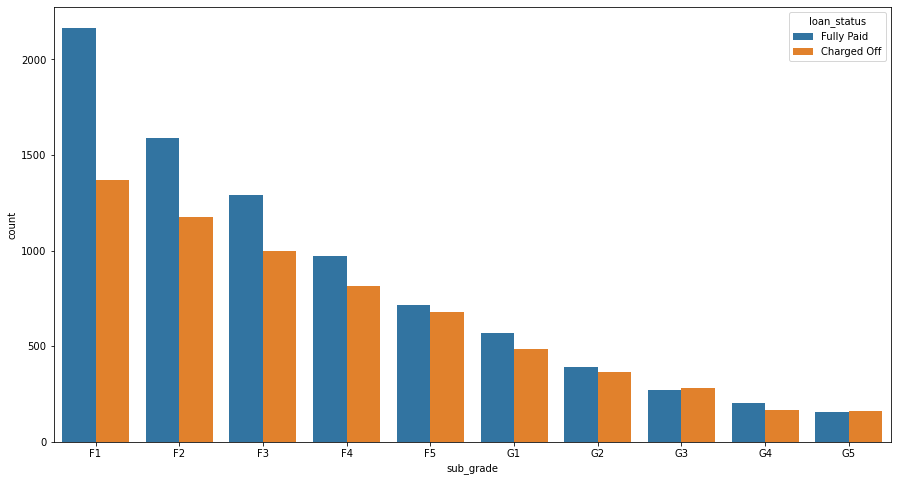

In [19]:
# it looks like F and G scores are the most risky for the loan club
# I will explore these values
FG = df[(df['grade'] == 'F') | (df['grade'] == 'G')]


order = sorted(FG['sub_grade'].unique())
plt.figure(figsize=(15,8))
sns.countplot(x='sub_grade', hue='loan_status', data = FG, order=order)

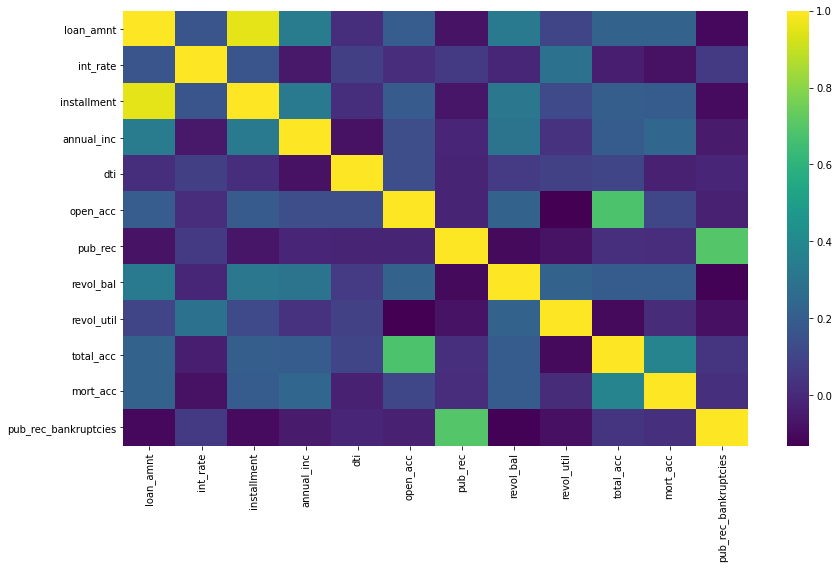

In [20]:
plt.figure(figsize=(14,8))
sns.heatmap(df.corr(), cmap='viridis')

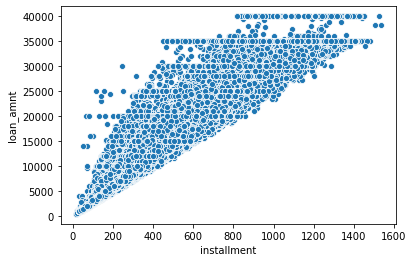

In [21]:
#check high correlation between installment and total amount of the loan 
sns.scatterplot(x='installment', y = 'loan_amnt', data = df)

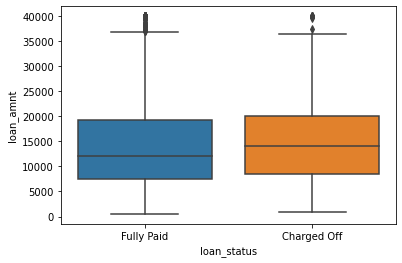

In [22]:
# check if the payment of the loan depends on its amount
sns.boxplot(y='loan_amnt', x='loan_status',data=df)

In [23]:
# after quick data visualisation lets create additional column called 'is_repaid' which values will be either 1 or 0
df['is_repaid'] = df['loan_status'].map({
                                         'Fully Paid':1,
                                         'Charged Off':0
                                         })

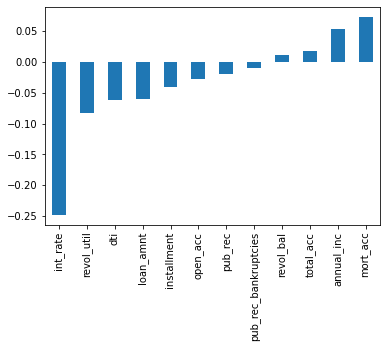

In [24]:
df.corr()['is_repaid'].sort_values().drop('is_repaid').plot(kind='bar')

# Data Preprocessing
##### in this section my goal is to remove unnecessary columns or fill any missing data if it is possible 

In [25]:
df.isna().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
is_repaid                   0
dtype: int64

In [26]:
df.isna().sum()/len(df)

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               0.057892
emp_length              0.046211
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.004431
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.000697
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                0.095435
pub_rec_bankruptcies    0.001351
address                 0.000000
is_repaid               0.000000
dtype: float64

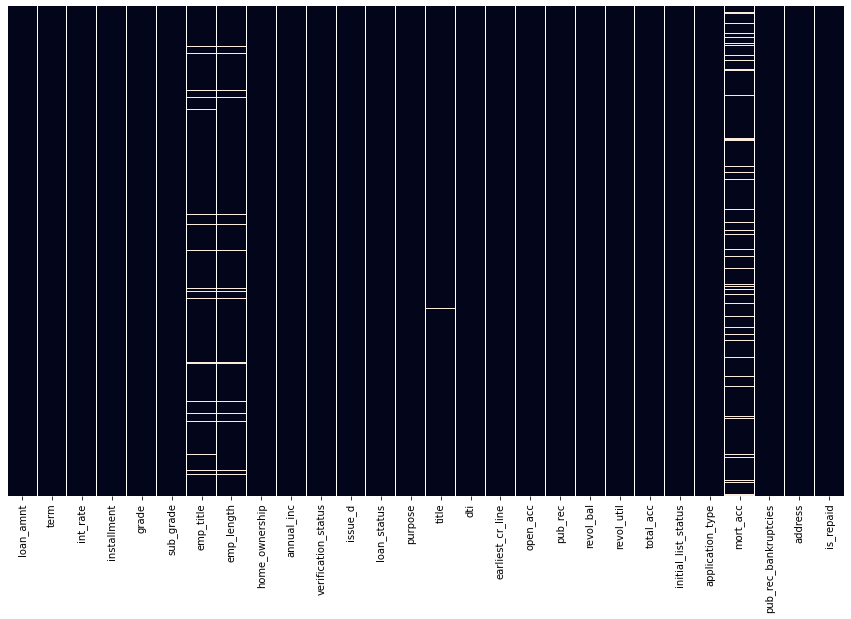

In [27]:
plt.figure(figsize=(15,9))
sns.heatmap(df.isnull(), yticklabels = False, cbar=False)

In [28]:
# lets check if it is possible to transform emp_title into dummies 
# I will explore how many unique values are there
print(len(df['emp_title'].unique()))

173106


In [29]:
# there are way to many values to convert them into dummies so I will drop this column
df = df.drop('emp_title', axis=1)

In [30]:
# now lets explore employment length
empL_order = sorted(df['emp_length'].dropna().unique())

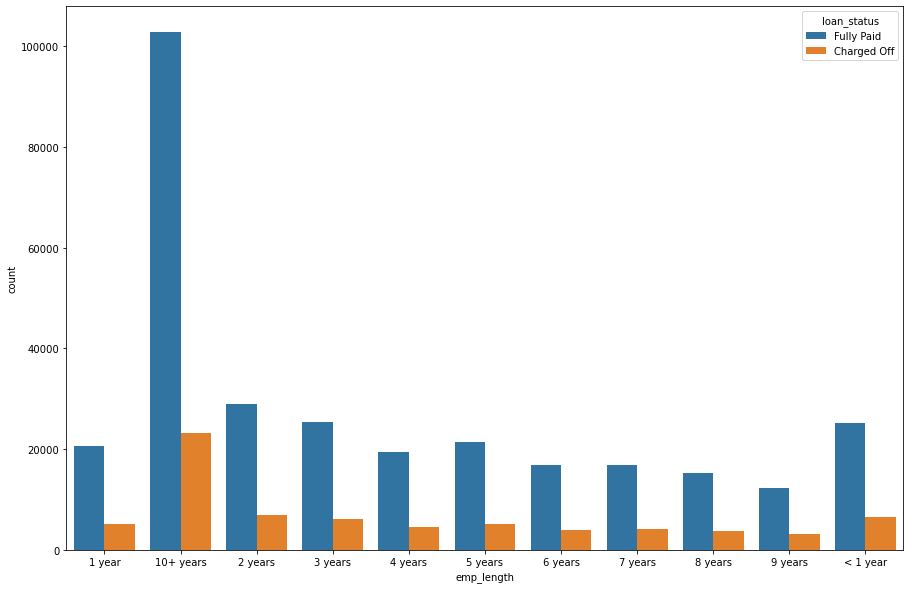

In [31]:
# lets plot out the count of loan takers depending on their emp_length and check if there...
# ... is a significant difference in repaying the loan
plt.figure(figsize=(15,10))
sns.countplot(x='emp_length', data = df,order=empL_order, hue = 'loan_status')

In [32]:
# it does not give us any valuable information 
# lets explore how does it looks like in terms of percentage 
# I will create pandas series with counts of people who did and did not pay depending on employment length 
charged_off = df[df['loan_status'] == "Charged Off"].groupby('emp_length').count()['loan_status']
fully_paid = df[df['loan_status'] == "Fully Paid"].groupby('emp_length').count()['loan_status']

In [33]:
# series which shows how many people did not pay the loan in percentage value
x = (charged_off / (charged_off + fully_paid)) * 100
x

emp_length
1 year       19.913453
10+ years    18.418610
2 years      19.326206
3 years      19.523133
4 years      19.238477
5 years      19.218721
6 years      18.919438
7 years      19.477400
8 years      19.976002
9 years      20.047016
< 1 year     20.687155
Name: loan_status, dtype: float64

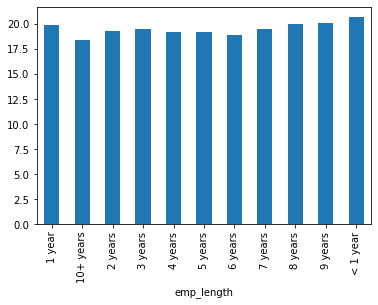

In [34]:
x.plot(kind='bar')

In [35]:
# these values are very similar for each category I will drop this column as well
df = df.drop('emp_length', axis = 1)

In [36]:
df.isna().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
is_repaid                   0
dtype: int64

In [37]:
# lets see if column 'title' is able to be filled with data
df['title'].value_counts()

Debt consolidation         152472
Credit card refinancing     51487
Home improvement            15264
Other                       12930
Debt Consolidation          11608
                            ...  
Mahogany                        1
Medical Loan Account            1
Roll-Up                         1
CC fix                          1
Lconsolidate                    1
Name: title, Length: 48817, dtype: int64

In [38]:
# it is a string and there are too many values to turn them into dummies. lets drop this one
df = df.drop('title', axis = 1)

In [40]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,is_repaid
0,10000.0,36 months,11.44,329.48,B,B4,RENT,117000.0,Not Verified,Jan-2015,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,MORTGAGE,65000.0,Not Verified,Jan-2015,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,RENT,43057.0,Source Verified,Jan-2015,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,RENT,54000.0,Not Verified,Nov-2014,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,MORTGAGE,55000.0,Verified,Apr-2013,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0


In [41]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
loan_amnt,396030.0,14113.888089,8357.441341,500.00,8000.00,12000.00,20000.00,40000.00
int_rate,396030.0,13.639400,4.472157,5.32,10.49,13.33,16.49,30.99
installment,396030.0,431.849698,250.727790,16.08,250.33,375.43,567.30,1533.81
annual_inc,396030.0,74203.175798,61637.621158,0.00,45000.00,64000.00,90000.00,8706582.00
dti,396030.0,17.379514,18.019092,0.00,11.28,16.91,22.98,9999.00
open_acc,396030.0,11.311153,5.137649,0.00,8.00,10.00,14.00,90.00
pub_rec,396030.0,0.178191,0.530671,0.00,0.00,0.00,0.00,86.00
revol_bal,396030.0,15844.539853,20591.836109,0.00,6025.00,11181.00,19620.00,1743266.00
revol_util,395754.0,53.791749,24.452193,0.00,35.80,54.80,72.90,892.30
total_acc,396030.0,25.414744,11.886991,2.00,17.00,24.00,32.00,151.00


In [42]:
# lets explore mort_acc column, in terms of filling missing data
# I will start with checking if this column has high corelation with any other column
df.corr()["mort_acc"]

loan_amnt               0.222315
int_rate               -0.082583
installment             0.193694
annual_inc              0.236320
dti                    -0.025439
open_acc                0.109205
pub_rec                 0.011552
revol_bal               0.194925
revol_util              0.007514
total_acc               0.381072
mort_acc                1.000000
pub_rec_bankruptcies    0.027239
is_repaid               0.073111
Name: mort_acc, dtype: float64

In [43]:
df['mort_acc'].value_counts().sort_values()

34.0         1
30.0         1
28.0         1
31.0         2
26.0         2
32.0         2
23.0         2
27.0         3
25.0         4
21.0         4
22.0         7
24.0        10
20.0        13
19.0        15
18.0        18
17.0        22
16.0        37
15.0        61
14.0       107
13.0       146
12.0       264
11.0       479
10.0       865
9.0       1656
8.0       3121
7.0       6052
6.0      11069
5.0      18194
4.0      27887
3.0      38049
2.0      49948
1.0      60416
0.0     139777
Name: mort_acc, dtype: int64

In [44]:
# the corelation with total acc is pretty high
# I will create a function which will determin the value of the mort_acc depending on total_acc 
import random
def fill_mort_acc(cols):
    mort_acc = cols[0]
    total_acc = cols[1]
    
    if pd.isnull(mort_acc):
        if total_acc < 17:
            return 0.0
        elif total_acc >= 17 and total_acc < 24:
            return 1.0
        elif total_acc >= 24 and total_acc < 32:
            n = random.randint(0,10)
            if n % 2 == 0:
                return 2.0
            return 3.0
        else:
            n = random.randint(0,100)
            if n == 100:
                return 15.0
            elif n % 21 == 0:
                return 13.0
            elif n % 13 == 0:
                return 11.0
            elif n % 11 == 0:
                x = random.randint(8,9)
            elif n%7 == 0:
                x = random.randint(6,7)
            else: 
                x = random.randint(4,5)
        return float(x)
    else:
        return mort_acc

In [45]:
df['mort_acc'] = df[['mort_acc', 'total_acc']].apply(fill_mort_acc, axis=1)

In [46]:
df.isna().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
is_repaid                 0
dtype: int64

In [47]:
# okay, missing values represent less than 0.5% of the dataframe, I will remove entries with missing values.
df = df.dropna()

In [48]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
is_repaid               0
dtype: int64

In [49]:
# it looks that I removed the missing data.
# Now lets move on to the next step which is turning strings into dummy variables. 
# check which columns contain string values
df.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

In [50]:
df['term'] = df['term'].apply(lambda term:int(term[:3]))

In [51]:
df['term'].value_counts()

36    301247
60     93972
Name: term, dtype: int64

In [52]:
# next non numeric feature is grade which is also included in subgrade.
# I will drop this one
df = df.drop('grade', axis = 1)

In [53]:
subgrades_as_dummies = pd.get_dummies(df['sub_grade'], drop_first=True)
subgrades_as_dummies

,A2,A3,A4,A5,B1,B2,B3,B4,B5,C1,...,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
396026,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
396027,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
396028,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
df = pd.concat([df.drop('sub_grade',axis=1),subgrades_as_dummies], axis=1)

In [55]:
df.head(2)

,loan_amnt,term,int_rate,installment,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,...,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5
0,10000.0,36,11.44,329.48,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,...,0,0,0,0,0,0,0,0,0,0
1,8000.0,36,11.99,265.68,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,...,0,0,0,0,0,0,0,0,0,0


In [56]:
df.select_dtypes(['object']).columns

Index(['home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

In [57]:
home_own = pd.get_dummies(df['home_ownership'], drop_first=True)
df = pd.concat([df.drop('home_ownership',axis=1),home_own], axis=1)

In [58]:
vs = pd.get_dummies(df['verification_status'], drop_first=True)
df = pd.concat([df.drop('verification_status', axis=1),vs], axis=1)

In [59]:
dummies = pd.get_dummies(df['purpose'], drop_first=True)
df = pd.concat([df.drop('purpose', axis=1),dummies], axis=1)

In [60]:
dummies = pd.get_dummies(df['initial_list_status'], drop_first=True)
df = pd.concat([df.drop('initial_list_status', axis=1),dummies], axis=1)

In [61]:
dummies = pd.get_dummies(df['application_type'], drop_first=True)
df = pd.concat([df.drop('application_type', axis=1),dummies], axis=1)

In [62]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'issue_d',
       'loan_status', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies', 'address', 'is_repaid', 'A2', 'A3', 'A4', 'A5',
       'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2',
       'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4',
       'F5', 'G1', 'G2', 'G3', 'G4', 'G5', 'MORTGAGE', 'NONE', 'OTHER', 'OWN',
       'RENT', 'Source Verified', 'Verified', 'credit_card',
       'debt_consolidation', 'educational', 'home_improvement', 'house',
       'major_purchase', 'medical', 'moving', 'other', 'renewable_energy',
       'small_business', 'vacation', 'wedding', 'w', 'INDIVIDUAL', 'JOINT'],
      dtype='object')

In [63]:
df['zipcode'] = df['address'].apply(lambda x:int(x[-5:]))

In [64]:
df['zipcode'].value_counts()

70466    56880
22690    56413
30723    56402
48052    55811
813      45725
29597    45393
5113     45300
11650    11210
93700    11126
86630    10959
Name: zipcode, dtype: int64

In [65]:
dummies = pd.get_dummies(df["zipcode"], drop_first = True)
df = pd.concat([df.drop(['zipcode', 'address'],axis=1), dummies], axis = 1)

In [66]:
df.columns

Index([           'loan_amnt',                 'term',             'int_rate',
                'installment',           'annual_inc',              'issue_d',
                'loan_status',                  'dti',     'earliest_cr_line',
                   'open_acc',              'pub_rec',            'revol_bal',
                 'revol_util',            'total_acc',             'mort_acc',
       'pub_rec_bankruptcies',            'is_repaid',                   'A2',
                         'A3',                   'A4',                   'A5',
                         'B1',                   'B2',                   'B3',
                         'B4',                   'B5',                   'C1',
                         'C2',                   'C3',                   'C4',
                         'C5',                   'D1',                   'D2',
                         'D3',                   'D4',                   'D5',
                         'E1',                   'E2

In [67]:
df = df.drop('issue_d', axis=1)

In [68]:
df['earliest_cr_year'] = df['earliest_cr_line'].apply(lambda x: int(x[-4:]))

In [69]:
df = df.drop('earliest_cr_line', axis=1)

In [70]:
df.select_dtypes(['object']).columns

Index(['loan_status'], dtype='object')

In [71]:
# okay, now only the classifiaction column is left as object
# column is_repaid has its binary value as well so I will drop this feature and move on to next section
df = df.drop('loan_status', axis=1)

# Split test

In [72]:
from sklearn.model_selection import train_test_split

In [73]:
df.columns

Index([           'loan_amnt',                 'term',             'int_rate',
                'installment',           'annual_inc',                  'dti',
                   'open_acc',              'pub_rec',            'revol_bal',
                 'revol_util',            'total_acc',             'mort_acc',
       'pub_rec_bankruptcies',            'is_repaid',                   'A2',
                         'A3',                   'A4',                   'A5',
                         'B1',                   'B2',                   'B3',
                         'B4',                   'B5',                   'C1',
                         'C2',                   'C3',                   'C4',
                         'C5',                   'D1',                   'D2',
                         'D3',                   'D4',                   'D5',
                         'E1',                   'E2',                   'E3',
                         'E4',                   'E5

In [74]:
X = df.drop('is_repaid', axis = 1).values
y = df['is_repaid'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [75]:
from sklearn.preprocessing import MinMaxScaler

In [76]:
scaler = MinMaxScaler()

In [77]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [78]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [79]:
model = Sequential()

In [80]:
df.shape

(395219, 81)

In [81]:
model.add(Dense(81, activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(41, activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(20, activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(units=1, activation = 'sigmoid'))

model.compile(loss='binary_crossentropy', optimizer = 'adam')

In [82]:
model.fit(x = X_train, y = y_train, epochs = 25, validation_data=(X_test,y_test), batch_size = 256)

Epoch 1/25
1236/1236 [==============================] - 6s 4ms/step - loss: 0.3250 - val_loss: 0.2655
Epoch 2/25
1236/1236 [==============================] - 6s 5ms/step - loss: 0.2707 - val_loss: 0.2637
Epoch 3/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2669 - val_loss: 0.2638
Epoch 4/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2642 - val_loss: 0.2636
Epoch 5/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2637 - val_loss: 0.2632
Epoch 6/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2626 - val_loss: 0.2622
Epoch 7/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2623 - val_loss: 0.2629
Epoch 8/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2619 - val_loss: 0.2621
Epoch 9/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2616 - val_loss: 0.2630
Epoch 10/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.261

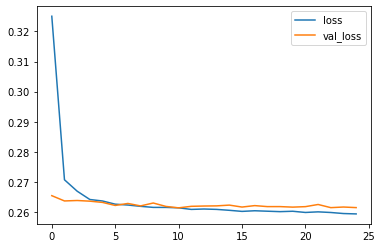

In [83]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [84]:
from sklearn.metrics import classification_report, confusion_matrix

In [85]:
predictions = (model.predict(X_test) > 0.5) * 1

In [86]:
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      0.43      0.60     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.94      0.71      0.77     79044
weighted avg       0.90      0.89      0.87     79044

[[ 6728  8930]
 [    5 63381]]


In [87]:
import random
random.seed(101)
random_ind = random.randint(0,len(df))

new_customer = df.drop('is_repaid',axis=1).iloc[random_ind]
new_customer

loan_amnt           25000.00
term                   60.00
int_rate               18.24
installment           638.11
annual_inc          61665.00
                      ...   
48052                   0.00
70466                   0.00
86630                   0.00
93700                   0.00
earliest_cr_year     1996.00
Name: 305323, Length: 80, dtype: float64

In [93]:
(model.predict(new_customer.values.reshape(1,80)) > 0.5) * 1

array([[1]])

In [94]:
# now lets check if this person has actually repaid his or her loan
df.iloc[random_ind]['is_repaid']

1.0